In [9]:
# GitHub: https://github.com/google-research/scenic/tree/main/scenic/projects/owl_vit
# Medium Article: https://medium.com/@Mert.A/zero-shot-object-detection-with-owl-vit-and-huggingface-cbf04a509904

from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image
import cv2
import numpy as np
import torch

In [10]:
owlvit_path = r".models\owlvit"  # "google/owlvit-base-patch32"

processor = OwlViTProcessor.from_pretrained(owlvit_path, local_files_only=True)

# This process may take a while as the model is very large and it takes time to download.
detector = OwlViTForObjectDetection.from_pretrained(owlvit_path, local_files_only=True)

In [11]:
img_path = r"X:\_\Project_Hsieh_Bone-Density\from_VA_update\MIRROR-EHR-Python\.example_source_images\example_report\example_dxa_report.jpg"
# img_path = r"X:\_\dax-westerman\cat-detector\.test_images\cat_images\20191201_122207.jpg"
image = Image.open(img_path)

In [12]:
classes = ["table"]
inputs = processor(text=classes, images=image, return_tensors="pt")

In [13]:
outputs = detector(**inputs)

target_sizes = torch.Tensor([image.size[::-1]])

predictions = processor.post_process_object_detection(
    outputs=outputs, target_sizes=target_sizes, threshold=0.1
)

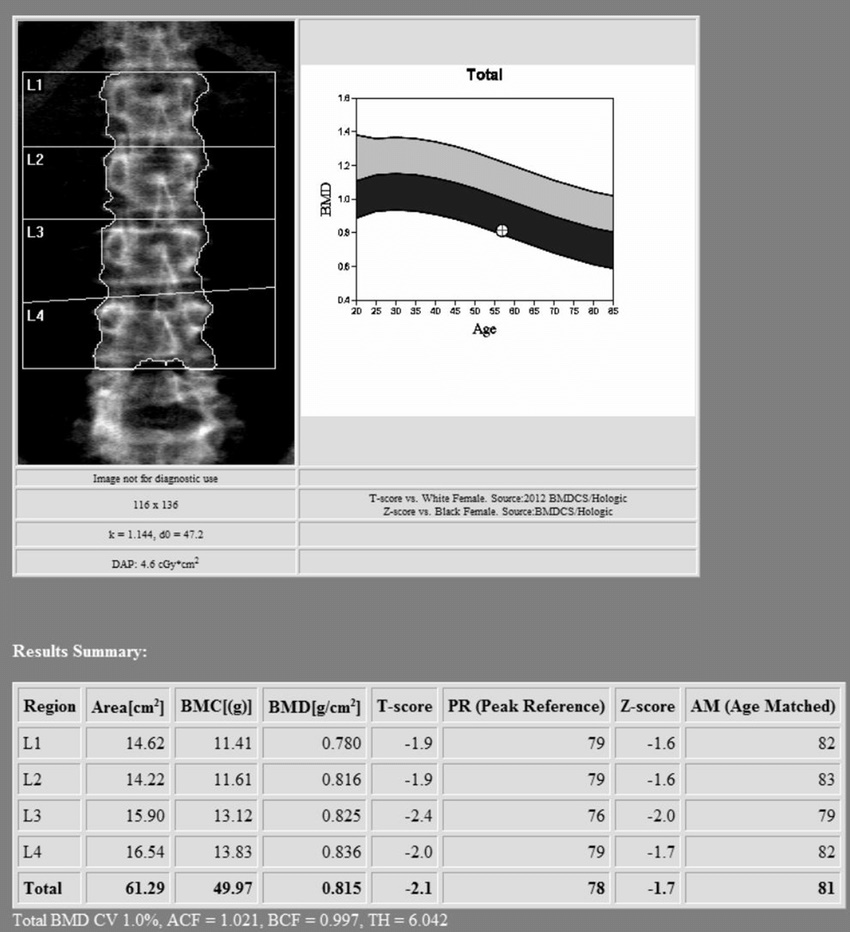

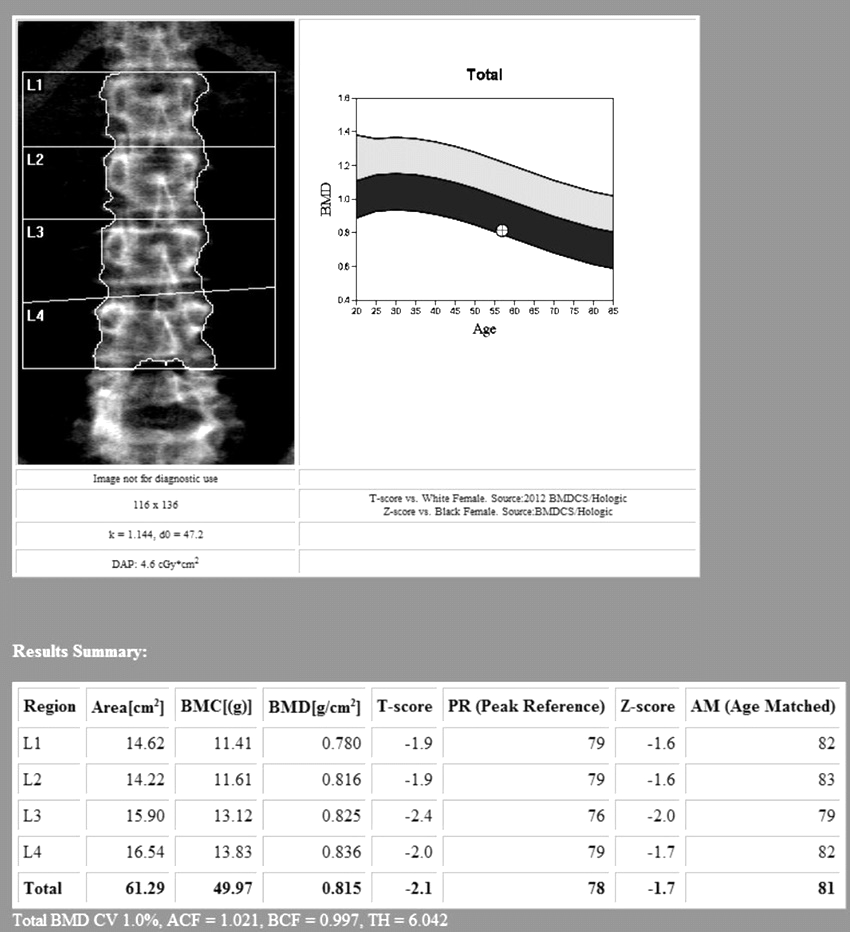

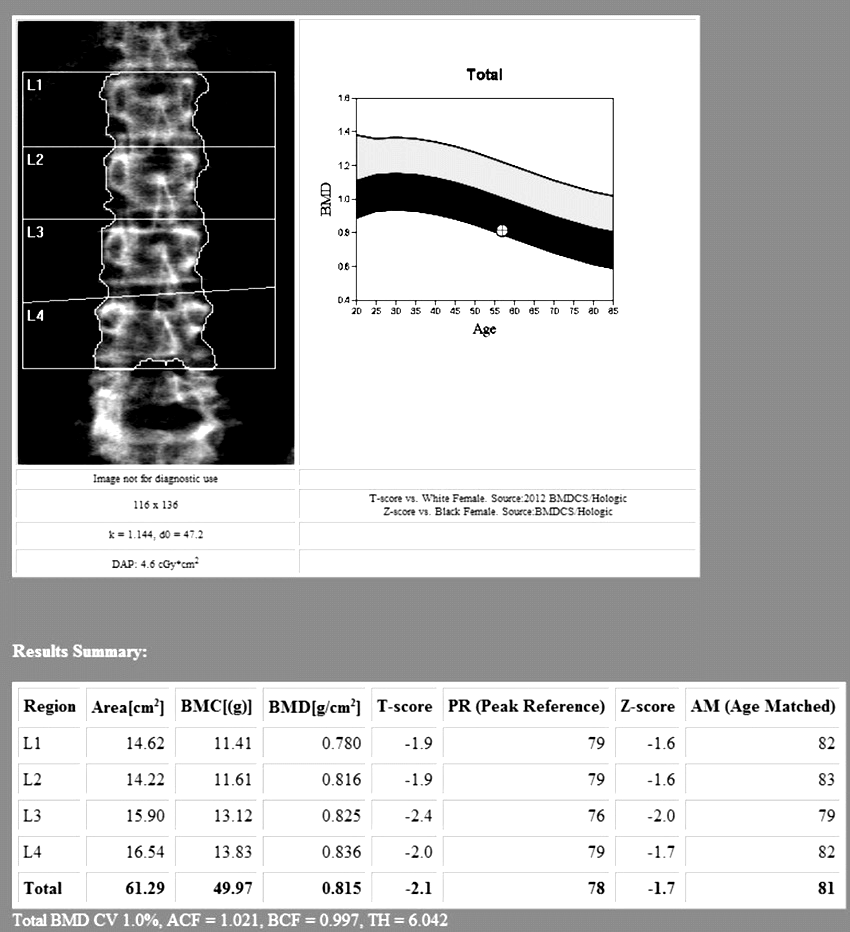

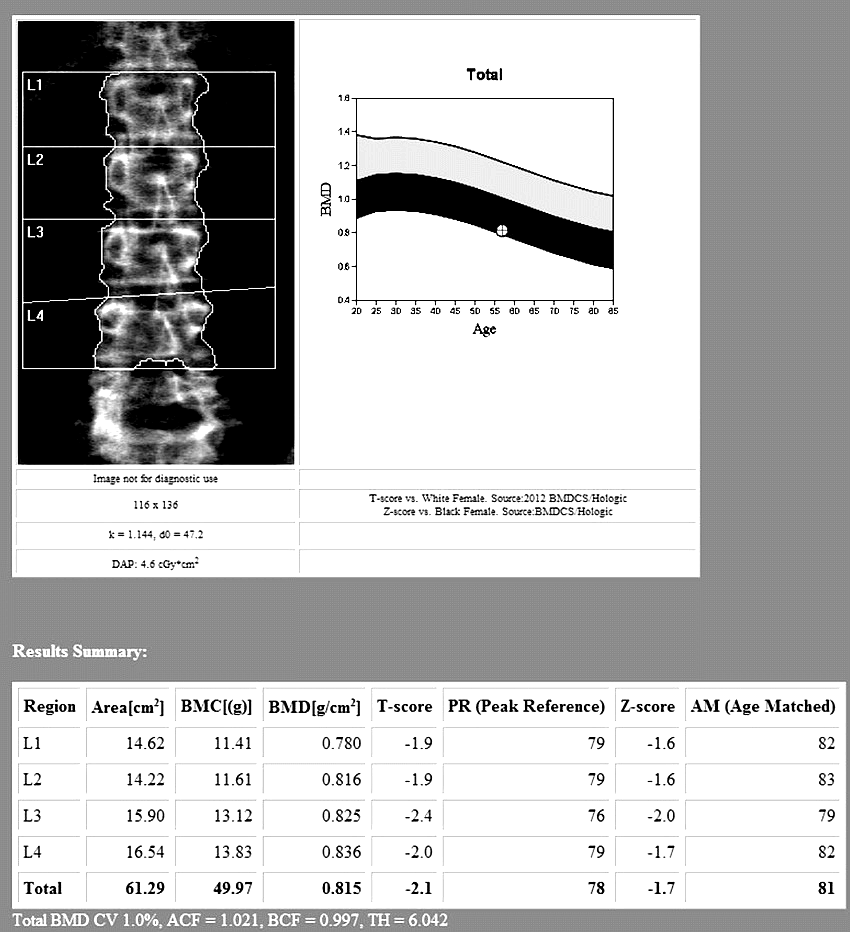

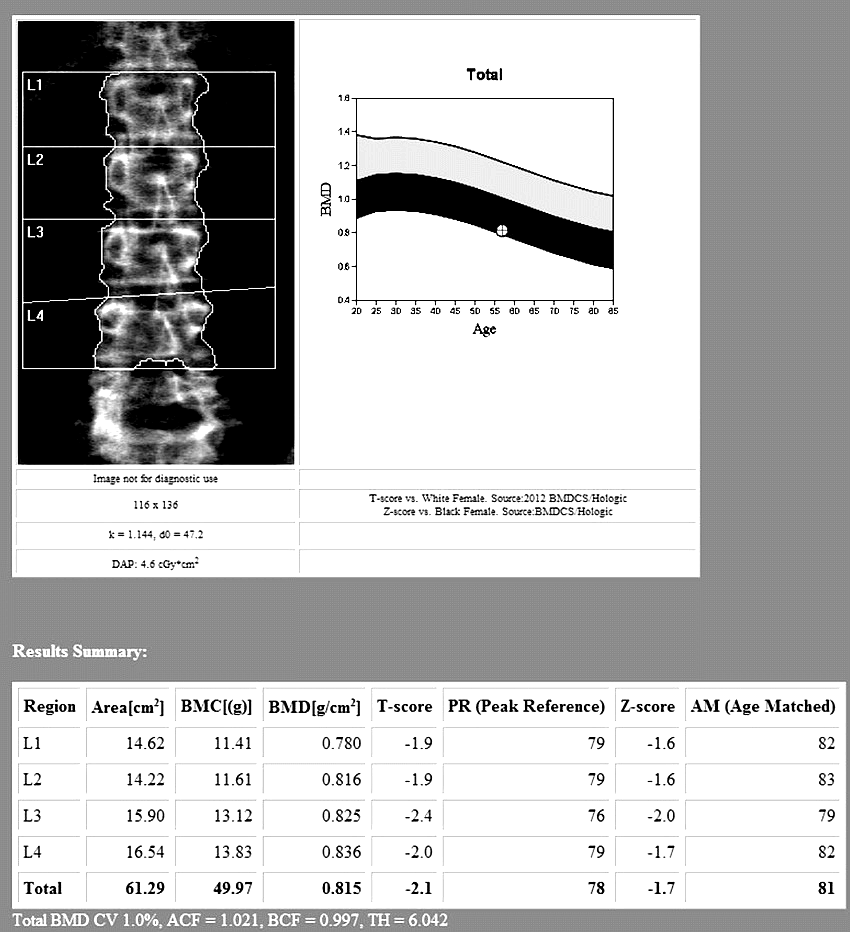

In [19]:
import numpy as np
from PIL import Image, ImageEnhance

image = np.array(image)  # convert it to numpy array

pil_img = Image.fromarray(image)
display(pil_img)

# Enhance brightness
brightness_enhancer = ImageEnhance.Brightness(pil_img)
image = brightness_enhancer.enhance(1.2)  # Increase brightness by 20%
display(image)

# Enhance contrast
contrast_enhancer = ImageEnhance.Contrast(image)
image = contrast_enhancer.enhance(1.3)  # Increase contrast by 30%
display(image)

# Enhance sharpness
sharpness_enhancer = ImageEnhance.Sharpness(image)
image = sharpness_enhancer.enhance(2.0)  # Double the sharpness
display(image)

# Enhance color
color_enhancer = ImageEnhance.Color(image)
image = color_enhancer.enhance(1.5)  # Increase color by 50%
display(image)


In [15]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # change from BGR to RGB

boxes, scores, labels = predictions[0]["boxes"], predictions[0]["scores"], predictions[0]["labels"]
for box, score, label in zip(boxes, scores, labels):
    cv2.rectangle(image, (int(box[0]), int(box[1])),
                          (int(box[2]), int(box[3])), (255, 0, 0), 2)
    cv2.putText(image, f"{classes[label]}",
                (int(box[0]), int(box[1]) - 10),
                cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1)

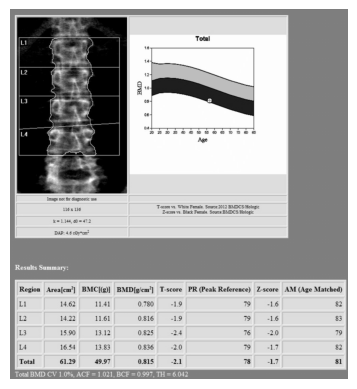

In [16]:
import cv2
import matplotlib.pyplot as plt

# Read the image
# image = cv2.imread('path/to/your/image.jpg') 

# Convert from BGR to RGB (OpenCV uses BGR, Matplotlib uses RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axis ticks
plt.show()